# Importing the required libraries:

In [1]:
# Importing the libraries which are required

import numpy as np # for linear algebra
import pandas as pd # for data preprocessing

import matplotlib
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
sns.set()

# Importing the dataset to python:

In [2]:
# Reading the data which is in the csv format

Gold_price_data = pd.read_csv(r'C:\Users\HP\Desktop\Gold\gld_price_data.csv')

# Overview of the dataset:

In [3]:
# Printing the first five rows of the Gold_price_data

Gold_price_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Printing the last five rows of the Gold_price_data

Gold_price_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
Gold_price_data.shape

(2290, 6)

In [6]:
Gold_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
Date       2290 non-null object
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5), object(1)
memory usage: 107.4+ KB


# Checking for the missing values or the NULL values:

In [7]:
# Checking for the null values

Gold_price_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
Gold_price_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
Gold_price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882499,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303296,1.369971,1.598798


In [10]:
# view summary statistics in numerical variables

round(Gold_price_data.describe(),2)

,SPX,GLD,USO,SLV,EUR/USD
count,2290.00,2290.00,2290.00,2290.00,2290.00
mean,1654.32,122.73,31.84,20.08,1.28
std,519.11,23.28,19.52,7.09,0.13
min,676.53,70.00,7.96,8.85,1.04
25%,1239.87,109.73,14.38,15.57,1.17
50%,1551.43,120.58,33.87,17.27,1.30
75%,2073.01,132.84,37.83,22.88,1.37
max,2872.87,184.59,117.48,47.26,1.60


# Checking for the correlation:

In [11]:
correlation = Gold_price_data.corr()

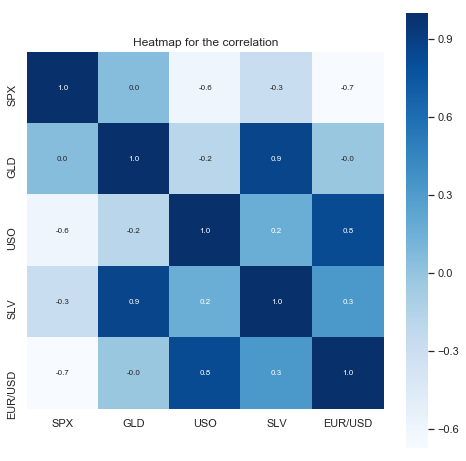

In [12]:
# Construction a heatmap to undestand the correlation

plt.figure(figsize= (8,8))
plt.title('Heatmap for the correlation')
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

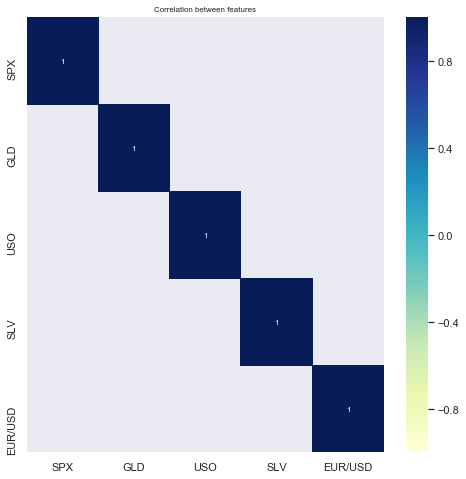

In [13]:
# Plotting correlation plot

# Set the figure size
plt.figure(figsize=(8,8))
sns.heatmap(correlation[(correlation>=0.9)|(correlation<=-0.9)],
           cmap='YlGnBu', vmax=1.0, vmin=-1.0,
           annot=True, annot_kws={'size':8})

# Set the title
# fontsize=8: set the fontsize of the title
plt.title('Correlation between features', fontsize=8)

# display the plot
plt.show()

In [14]:
# Checking for the correlation values of Gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [15]:
# Sorting the correlation values in the descending order

print (correlation['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [16]:
# Checking our target variable

print('Skewness: %f', Gold_price_data['GLD'].skew())
print("Kurtosis: %f" % Gold_price_data['GLD'].kurt())

Skewness: %f 0.33413834726925085
Kurtosis: -0.275081


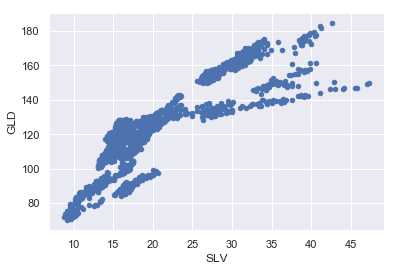

In [17]:
Gold_price_data.plot(kind='scatter', x='SLV', y='GLD')

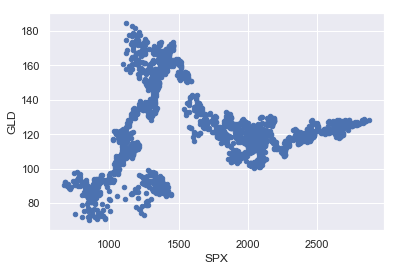

In [18]:
Gold_price_data.plot(kind='scatter', x='SPX', y='GLD')

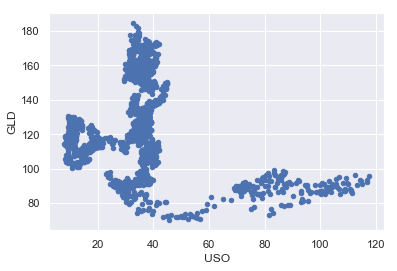

In [19]:
Gold_price_data.plot(kind='scatter', x='USO', y='GLD')

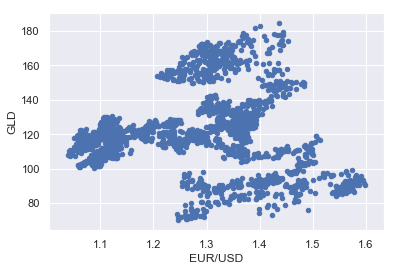

In [20]:
Gold_price_data.plot(kind='scatter', x='EUR/USD', y='GLD')

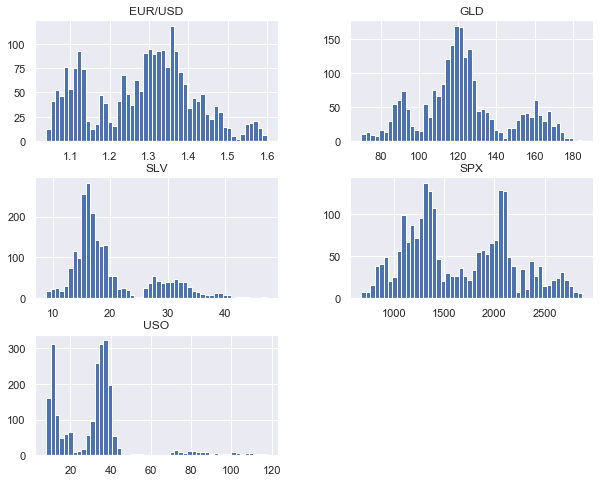

In [21]:
Gold_price_data.hist(bins=50, figsize=(10, 8))
plt.show()

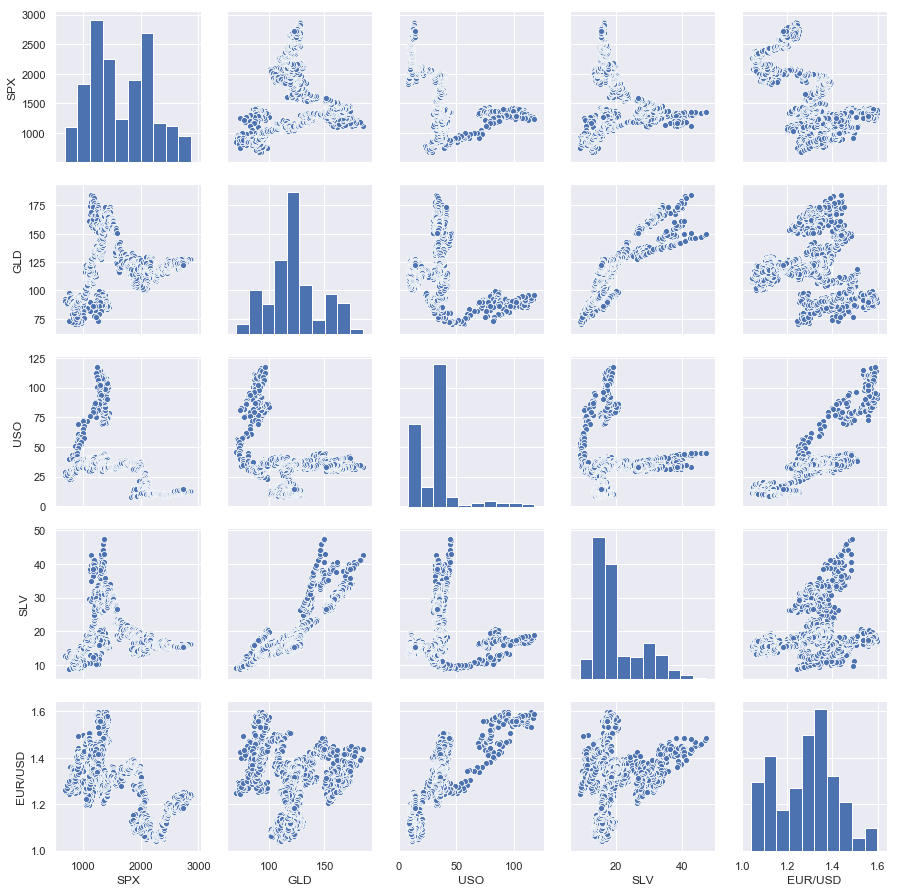

In [22]:
sns.pairplot(Gold_price_data)

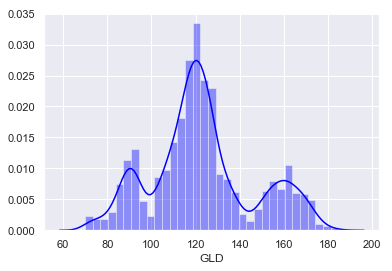

In [23]:
#Checking the distribution of the Gold Price

sns.distplot(Gold_price_data['GLD'], color='blue')

In [24]:
X = Gold_price_data.drop(['Date', 'GLD'], axis=1)
Y = Gold_price_data['GLD']

In [25]:
print(X)

              SPX        USO        SLV   EUR/USD
0     1447.160034  78.470001  15.180000  1.471692
1     1447.160034  78.370003  15.285000  1.474491
2     1411.630005  77.309998  15.167000  1.475492
3     1416.180054  75.500000  15.053000  1.468299
4     1390.189941  76.059998  15.590000  1.557099
5     1409.130005  75.250000  15.520000  1.466405
6     1420.329956  74.019997  16.061001  1.480100
7     1401.020020  73.089996  16.077000  1.479006
8     1416.250000  74.250000  16.280001  1.486900
9     1380.949951  72.779999  15.834000  1.480210
10    1373.199951  71.849998  15.654000  1.466405
11    1333.250000  71.029999  15.717000  1.464000
12    1325.189941  71.540001  16.030001  1.461796
13    1310.500000  70.550003  15.902000  1.464794
14    1338.599976  69.500000  15.900000  1.463208
15    1352.069946  70.930000  16.299999  1.477410
16    1330.609985  71.910004  16.298000  1.467502
17    1353.959961  72.349998  16.549999  1.478809
18    1362.300049  72.980003  16.534000  1.477192


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
5        86.550003
6        88.250000
7        88.580002
8        89.540001
9        87.989998
10       86.699997
11       86.500000
12       87.419998
13       88.169998
14       87.889999
15       90.080002
16       90.300003
17       91.750000
18       91.150002
19       92.059998
20       91.400002
21       89.349998
22       89.099998
23       87.680000
24       88.949997
25       89.849998
26       91.000000
27       91.330002
28       89.330002
29       89.440002
           ...    
2260    128.279999
2261    127.489998
2262    125.730003
2263    125.790001
2264    127.260002
2265    126.300003
2266    126.449997
2267    125.800003
2268    126.820000
2269    127.120003
2270    128.110001
2271    126.620003
2272    127.629997
2273    127.750000
2274    127.849998
2275    127.599998
2276    125.620003
2277    126.230003
2278    125.410004
2279    124.970001
2280    124.589996
2281    123.

# Splitting the dataset into train set and test set:

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Data scaling:

In [82]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Linear Regression:

In [83]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled,Y_train)

LinearRegression()

In [84]:
Predict_Y = lm.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [85]:
lm_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
lm_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
lm_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [86]:
pd.DataFrame([lm_MAE, lm_MSE, lm_RMSE], index=['lm_MAE', 'lm_MSE', 'lm_RMSE'], columns=['Metrics'])

,Metrics
lm_MAE,5.911487
lm_MSE,70.788901
lm_RMSE,8.413614


In [87]:
Scores = cross_val_score(lm, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.9516121  0.93862678 0.9350007  0.93644717 0.94100319]


In [88]:
r2_score(Y_test, lm.predict(X_test_scaled))

0.8657886565869237

Text(0,0.5,'Predicted Y')

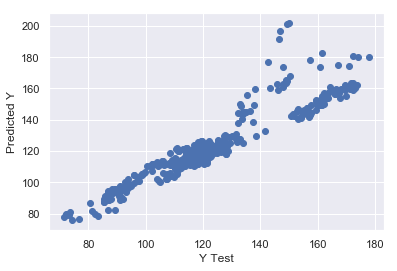

In [89]:
predictions = lm.predict(X_test)
plt.scatter(Y_test, Predict_Y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [90]:
from sklearn import metrics
#create a list of column names
cols = ["Model", "MAE", "MSE", "RMSE", "R2 Score"]

#creating the required information
result_tabulation = pd.DataFrame(columns=cols)

linear_regression = pd.Series({"Model" : "linear_regression ", 
                                    "MAE" : lm_MAE,
                                    "MSE" : lm_MSE,
                                    "RMSE": lm_RMSE,
                                    "R2 Score": r2_score(Y_test, lm.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(linear_regression , ignore_index=True)

# Decision Tree Regressor:

In [91]:
## import DecisionTree regressor algorithm and fit the model

from sklearn.tree  import DecisionTreeRegressor

decision=DecisionTreeRegressor()
decision.fit(X_train_scaled, Y_train)

DecisionTreeRegressor()

In [92]:
Predict_Y = decision.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [93]:
decision_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
decision_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
decision_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [94]:
pd.DataFrame([decision_MAE, decision_MSE, decision_RMSE], index=['decision_MAE', 'decision_MSE', 'decision_RMSE'], columns=['Metrics'])

,Metrics
decision_MAE,1.377563
decision_MSE,7.804394
decision_RMSE,2.793635


In [95]:
Scores = cross_val_score(decision, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.98834063 0.99055047 0.98307179 0.98310076 0.98747126]


In [96]:
r2_score(Y_test, decision.predict(X_test_scaled))

0.985203355865129

In [97]:
decision = pd.Series({"Model" : "Decision Tree", 
                                    "MAE" : decision_MAE,
                                    "MSE" : decision_MSE,
                                    "RMSE": decision_RMSE,
                                    "R2 Score": r2_score(Y_test, decision.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(decision,ignore_index=True)

# Random Forest Regressor:

In [98]:
## import RandomForest regressor algorithm and fit the model

from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor()
random.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [99]:
Predict_Y = random.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [100]:
random_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
random_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
random_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [101]:
pd.DataFrame([random_MAE, random_MSE, random_RMSE], index=['random_MAE', 'random_MSE', 'random_RMSE'], columns=['Metrics'])

,Metrics
random_MAE,1.301475
random_MSE,5.249189
random_RMSE,2.291111


In [102]:
Scores = cross_val_score(random, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.99474081 0.99520024 0.99261319 0.9934593  0.99507893]


In [103]:
r2_score(Y_test, random.predict(X_test_scaled))

0.9900478650358311

In [104]:
random = pd.Series({"Model" : "Random Forest", 
                                    "MAE" : random_MAE,
                                    "MSE" : random_MSE,
                                    "RMSE": random_RMSE,
                                    "R2 Score": r2_score(Y_test, random.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(random,ignore_index=True)

# Ridge:

In [105]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)

Ridge()

In [106]:
Predict_Y = ridge.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [107]:
ridge_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
ridge_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
ridge_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [108]:
pd.DataFrame([ridge_MAE, ridge_MSE, ridge_RMSE], index=['ridge_MAE', 'ridge_MSE', 'ridge_RMSE'], columns=['Metrics'])

,Metrics
ridge_MAE,5.913804
ridge_MSE,70.767865
ridge_RMSE,8.412364


In [109]:
Scores = cross_val_score(ridge, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.95158698 0.93863613 0.93501468 0.93646152 0.94099049]


In [110]:
r2_score(Y_test, ridge.predict(X_test_scaled))

0.8658285385549092

In [111]:
ridge = pd.Series({"Model" : "Ridge", 
                                    "MAE" : ridge_MAE,
                                    "MSE" : ridge_MSE,
                                    "RMSE": ridge_RMSE,
                                    "R2 Score": r2_score(Y_test, ridge.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(ridge,ignore_index=True)

# Lasso:

In [112]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, Y_train)


Lasso()

In [113]:
Predict_Y = lasso.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [114]:
lasso_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
lasso_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
lasso_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [115]:
pd.DataFrame([lasso_MAE, lasso_MSE, lasso_RMSE], index=['lasso_MAE', 'lasso_MSE', 'lasso_RMSE'], columns=['Metrics'])

,Metrics
lasso_MAE,6.137635
lasso_MSE,72.507568
lasso_RMSE,8.515138


In [116]:
Scores = cross_val_score(lasso, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.94656041 0.93562535 0.93244166 0.9342156  0.93789306]


In [117]:
r2_score(Y_test, lasso.predict(X_test_scaled))

0.8625301702884223

In [118]:
lasso = pd.Series({"Model" : "LASSO", 
                                    "MAE" : lasso_MAE,
                                    "MSE" : lasso_MSE,
                                    "RMSE": lasso_RMSE,
                                    "R2 Score": r2_score(Y_test, lasso.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(lasso,ignore_index=True)

# Gradient Boosting Regressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, Y_train)

GradientBoostingRegressor()

In [120]:
Predict_Y = gbr.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [121]:
gbr_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
gbr_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
gbr_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [122]:
pd.DataFrame([gbr_MAE, gbr_MSE, gbr_RMSE], index=['gbr_MAE', 'gbr_MSE', 'gbr_RMSE'], columns=['Metrics'])

,Metrics
gbr_MAE,2.293207
gbr_MSE,12.439578
gbr_RMSE,3.526979


In [123]:
Scores = cross_val_score(gbr, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.98986397 0.99062081 0.98804814 0.98785457 0.99110613]


In [124]:
r2_score(Y_test, gbr.predict(X_test_scaled))

0.9764153359428546

In [125]:
gbr = pd.Series({"Model" : "Gradient Boosting Regressor", 
                                    "MAE" : gbr_MAE,
                                    "MSE" : gbr_MSE,
                                    "RMSE": gbr_RMSE,
                                    "R2 Score": r2_score(Y_test, gbr.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(gbr,ignore_index=True)

# AdaBoost Regressor

In [127]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor()
adaboost.fit(X_train_scaled, Y_train)

AdaBoostRegressor()

In [128]:
Predict_Y = adaboost.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [129]:
adaboost_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
adaboost_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
adaboost_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [130]:
pd.DataFrame([adaboost_MAE, adaboost_MSE, adaboost_RMSE], index=['adaboost_MAE', 'adaboost_MSE', 'adaboost_RMSE'], columns=['Metrics'])

,Metrics
adaboost_MAE,4.884977
adaboost_MSE,35.743054
adaboost_RMSE,5.978549


In [131]:
Scores = cross_val_score(adaboost, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.97152571 0.97105858 0.96659292 0.96531125 0.96963872]


In [132]:
r2_score(Y_test, adaboost.predict(X_test_scaled))

0.9322333978203621

In [133]:
adaboost = pd.Series({"Model" : "Adaboost Regressor", 
                                    "MAE" : adaboost_MAE,
                                    "MSE" : adaboost_MSE,
                                    "RMSE": adaboost_RMSE,
                                    "R2 Score": r2_score(Y_test, adaboost.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(adaboost,ignore_index=True)

# Stochastic Gradient Regressor

In [135]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X_train_scaled, Y_train)

SGDRegressor()

In [136]:
Predict_Y = sgd.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [137]:
sgd_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
sgd_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
sgd_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [138]:
pd.DataFrame([sgd_MAE, sgd_MSE, sgd_RMSE], index=['sgd_MAE', 'sgd_MSE', 'sgd_RMSE'], columns=['Metrics'])

,Metrics
sgd_MAE,5.899501
sgd_MSE,70.877730
sgd_RMSE,8.418891


In [139]:
Scores = cross_val_score(sgd, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.95140893 0.93862168 0.93487555 0.93622934 0.94109354]


In [140]:
r2_score(Y_test, sgd.predict(X_test_scaled))

0.8656202411540764

In [141]:
sgd = pd.Series({"Model" : "SGDRegressor", 
                                    "MAE" : sgd_MAE,
                                    "MSE" : sgd_MSE,
                                    "RMSE": sgd_RMSE,
                                    "R2 Score": r2_score(Y_test, sgd.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(sgd,ignore_index=True)

# Support Vector Machine Regressor

In [143]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train_scaled, Y_train)

SVR()

In [144]:
Predict_Y = svm.predict(X_test_scaled)
Predict_Y = pd.DataFrame(Predict_Y)

In [145]:
svm_MAE = metrics.mean_absolute_error(Y_test, Predict_Y)
svm_MSE = metrics.mean_squared_error(Y_test, Predict_Y)
svm_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Predict_Y))

In [146]:
pd.DataFrame([svm_MAE, svm_MSE, svm_RMSE], index=['svm_MAE', 'svm_MSE', 'svm_RMSE'], columns=['Metrics'])

,Metrics
svm_MAE,3.453176
svm_MSE,32.557824
svm_RMSE,5.705946


In [147]:
Scores = cross_val_score(svm, X_train_scaled, Y_train, cv=5)
print(np.sqrt(Scores))

[0.97263793 0.96989594 0.96734984 0.96507839 0.97338395]


In [148]:
r2_score(Y_test, svm.predict(X_test_scaled))

0.9382723943216776

In [149]:
svm = pd.Series({"Model" : "SVR", 
                                    "MAE" : svm_MAE,
                                    "MSE" : svm_MSE,
                                    "RMSE": svm_RMSE,
                                    "R2 Score": r2_score(Y_test, svm.predict(X_test_scaled))})
#appending our result table
result_tabulation = result_tabulation.append(svm,ignore_index=True)

# Result

In [150]:
result_tabulation

,Model,MAE,MSE,RMSE,R2 Score
0,linear_regression,5.911487,70.788901,8.413614,0.865789
1,Decision Tree,1.377563,7.804394,2.793635,0.985203
2,Random Forest,1.301475,5.249189,2.291111,0.990048
3,Ridge,5.913804,70.767865,8.412364,0.865829
4,LASSO,6.137635,72.507568,8.515138,0.862530
5,Gradient Boosting Regressor,2.293207,12.439578,3.526979,0.976415
6,Adaboost Regressor,4.884977,35.743054,5.978549,0.932233
7,SGDRegressor,5.899501,70.877730,8.418891,0.865620
8,SVR,3.453176,32.557824,5.705946,0.938272


In [157]:
result_tabulation.sort_values('R2 Score',ascending=True)

,Model,MAE,MSE,RMSE,R2 Score
4,LASSO,6.137635,72.507568,8.515138,0.862530
7,SGDRegressor,5.899501,70.877730,8.418891,0.865620
0,linear_regression,5.911487,70.788901,8.413614,0.865789
3,Ridge,5.913804,70.767865,8.412364,0.865829
6,Adaboost Regressor,4.884977,35.743054,5.978549,0.932233
8,SVR,3.453176,32.557824,5.705946,0.938272
5,Gradient Boosting Regressor,2.293207,12.439578,3.526979,0.976415
1,Decision Tree,1.377563,7.804394,2.793635,0.985203
2,Random Forest,1.301475,5.249189,2.291111,0.990048


# Conclusion

By evaluating all the regression model we could conclude that the Random Forest Regressor is the most reliable model with a R2 score of 0.99